In [28]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

In [29]:
# TLS, single-tone
wd_red_larger = [1.2728, 1.2767, 1.2821, 1.2890, 1.2974, 1.3474, 1.4171, 1.5095]
shift_red_larger = [0.0455, 0.0533, 0.0641, 0.0780, 0.0948, 0.1948, 0.3342, 0.519]
devdr_red_larger = [0.007, 0.014, 0.025, 0.039, 0.056, 0.156, 0.295, 0.480]
devdr_th_red_larger = [0.006, 0.014, 0.026, 0.040, 0.058, 0.161, 0.317, 0.527]
wsb_red_larger = [0.0007435, 0.001667, 0.00294, 0.004549, 0.006461, 0.01697, 0.03080, 0.04578]
wd_blue_larger = [5.2716, 5.2781, 5.2887, 5.3032, 5.3224, 5.3452, 5.474, 5.6562, 5.8829]
shift_blue_larger = [0.0432, 0.0561, 0.0773, 0.1064, 0.1448, 0.1905, 0.448, 0.8124, 1.2658]
devdr_blue_larger = [0.004, 0.017, 0.038, 0.067, 0.106, 0.151, 0.409, 0.773, 1.227]
devdr_th_blue_larger = [0.004, 0.018, 0.041, 0.074, 0.117, 0.171, 0.529, 1.242, 2.756]
wsb_blue_larger = [0.0007608, 0.003019, 0.006727, 0.01183, 0.01815, 0.02563, 0.06447, 0.11186, 0.16296]
eps_larger = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.9])

wd_red_smaller = [1.2566, 1.2497, 1.2402, 1.2281, 1.2135, 1.1337, 1.0248, 0.8936]
shift_red_smaller = [-0.0131, 0.00056, 0.0196, 0.0438, 0.073, 0.2326, -0.4504, -0.7128]
devdr_red_smaller = [-0.011, -0.025, -0.044, -0.068, -0.097, -0.257, -0.475, -0.737]
devdr_th_red_smaller = [0.011, 0.025, 0.044, 0.069, 0.099, 0.272, 0.524, 0.853]
wsb_red_smaller = [0.0004685, 0.00104, 0.001855, 0.00291, 0.004213, 0.01214, 0.02523, 0.04539]
wd_blue_smaller = [5.2312, 5.2227, 5.2108, 5.1956, 5.177, 5.0683, 4.9041, 4.6878]
shift_blue_smaller = [-0.0377, -0.0546, -0.0784, -0.1089, -0.146, -0.3634, -0.6918, -1.1244]
devdr_blue_smaller = [-0.010, -0.027, -0.050, -0.081, -0.118, -0.335, -0.664, -1.096]
devdr_th_blue_smaller = [-0.014, -0.032, -0.057, -0.091, -0.133, -0.413, -0.974, -2.169]
wsb_blue_smaller = [0.001896, 0.004239, 0.007476, 0.01156, 0.01644, 0.04267, 0.07652, 0.1171]
eps_smaller = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.7, 0.9])

In [46]:
polydeg = 2
def quadratic_fit(x, a, b):
    x = np.asarray(x)
    return a*x**2 + b*x

devdr_red_larger_cfit = np.polyfit(eps_larger[1:], devdr_red_larger, polydeg)
devdr_blue_larger_cfit = np.polyfit(eps_larger, devdr_blue_larger, polydeg)
devdr_red_smaller_cfit = np.polyfit(eps_smaller, devdr_red_smaller, polydeg)
devdr_blue_smaller_cfit = np.polyfit(eps_smaller, devdr_blue_smaller, polydeg)
wsb_red_larger_cfit = np.polyfit(eps_larger[1:], wsb_red_larger, polydeg)
wsb_blue_larger_cfit = np.polyfit(eps_larger, wsb_blue_larger, polydeg)
wsb_red_smaller_cfit = np.polyfit(eps_smaller, wsb_red_smaller, polydeg)
wsb_blue_smaller_cfit = np.polyfit(eps_smaller, wsb_blue_smaller, polydeg)

devdr_th_red_larger_cfit,   _   = cf(quadratic_fit, eps_larger[1:], devdr_th_red_larger)
devdr_th_blue_larger_cfit,  _   = cf(quadratic_fit, eps_larger, devdr_th_blue_larger)
devdr_th_red_smaller_cfit,  _   = cf(quadratic_fit, eps_smaller, devdr_th_red_smaller)
devdr_th_blue_smaller_cfit, _   = cf(quadratic_fit, eps_smaller, devdr_th_blue_smaller)
# devdr_th_red_larger_cfit   = np.polyfit(np.insert(eps_larger[1:], 0, 0), np.insert(devdr_th_red_larger  , 0, 0), polydeg)
# devdr_th_blue_larger_cfit  = np.polyfit(np.insert(eps_larger    , 0, 0), np.insert(devdr_th_blue_larger , 0, 0), polydeg)
# devdr_th_red_smaller_cfit  = np.polyfit(np.insert(eps_smaller   , 0, 0), np.insert(devdr_th_red_smaller , 0, 0), polydeg)
# devdr_th_blue_smaller_cfit = np.polyfit(np.insert(eps_smaller   , 0, 0), np.insert(devdr_th_blue_smaller, 0, 0), polydeg)

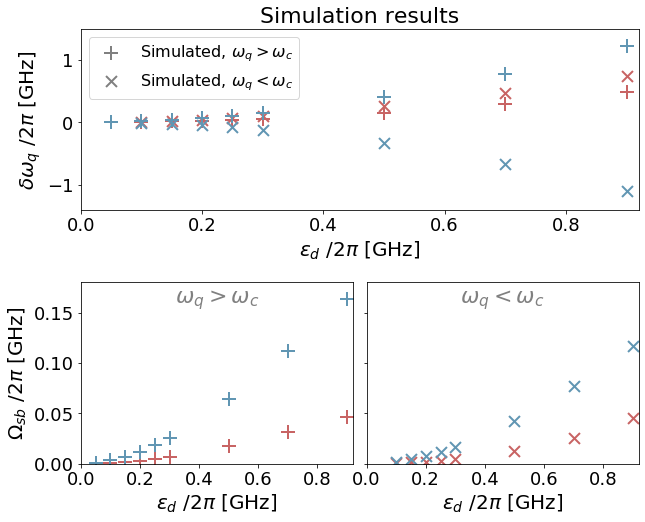

In [59]:
xlim = [0.0, 0.92]

fig, axes = plt.subplots(2, 1, figsize=(10,8))

plt.subplot(2, 1, 1)
plt.scatter(eps_larger[1:], devdr_red_larger, marker=markerstyles['larger'], lw=2, s=markersizes['larger'], c=plotcolours['sbred'])
plt.scatter(eps_smaller, -np.asarray(devdr_red_smaller), marker=markerstyles['smaller'], lw=2, s=markersizes['smaller'], c=plotcolours['sbred'])
plt.scatter(eps_larger, devdr_blue_larger, marker=markerstyles['larger'], lw=2, s=markersizes['larger'], c=plotcolours['sbblue'])
plt.scatter(eps_smaller, devdr_blue_smaller, marker=markerstyles['smaller'], lw=2, s=markersizes['smaller'], c=plotcolours['sbblue'])

# plt.plot(eps_larger[1:], devdr_th_red_larger, ls=linestyles['larger'], c=plotcolours['sbred'])
# plt.plot(eps_smaller, -np.asarray(devdr_th_red_smaller), ls=linestyles['smaller'], c=plotcolours['sbred'])
# plt.plot(eps_larger, devdr_th_blue_larger, ls=linestyles['larger'], c=plotcolours['sbblue'])
# plt.plot(eps_smaller, devdr_th_blue_smaller, ls=linestyles['smaller'], c=plotcolours['sbblue'])
# plt.plot(np.linspace(0, 1),  np.poly1d(np.append(devdr_th_red_larger_cfit, 0))(np.linspace(0, 1)), ls=linestyles['larger'], c=plotcolours['sbred'])
# plt.plot(np.linspace(0, 1),  np.poly1d(np.append(devdr_th_blue_larger_cfit, 0))(np.linspace(0, 1)), ls=linestyles['larger'], c=plotcolours['sbblue'])
# plt.plot(np.linspace(0, 1), -np.poly1d(np.append(devdr_th_red_smaller_cfit, 0))(np.linspace(0, 1)), ls=linestyles['smaller'], c=plotcolours['sbred'])
# plt.plot(np.linspace(0, 1),  np.poly1d(np.append(devdr_th_blue_smaller_cfit, 0))(np.linspace(0, 1)), ls=linestyles['smaller'], c=plotcolours['sbblue'])

plt.scatter(-1, -1, marker=markerstyles['larger'], lw=2, s=markersizes['larger'], c='gray', label="Simulated, $\\omega_q > \\omega_c$")
plt.scatter(-1, -1, marker=markerstyles['smaller'], lw=2, s=markersizes['smaller'], c='gray', label="Simulated, $\\omega_q < \\omega_c$")
# plt.plot(-1, -1, ls=linestyles['larger'], c='gray', label="Analytical, $\\omega_q > \\omega_c$")
# plt.plot(-1, -1, ls=linestyles['smaller'], c='gray', label="Analytical, $\\omega_q < \\omega_c$")

plt.xlim(xlim)
plt.ylim([-1.4, 1.5])

plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.ylabel("$\\delta\\omega_q$ $/2\\pi$ [GHz]")
plt.title("Simulation results")
plt.legend(fontsize=16)

plt.subplot(2, 2, 3)
plt.scatter(eps_larger[1:], wsb_red_larger, marker=markerstyles['larger'], lw=2, s=markersizes['larger'], c=plotcolours['sbred'])
plt.scatter(eps_larger, wsb_blue_larger, marker=markerstyles['larger'], lw=2, s=markersizes['larger'], c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([0, 0.18])

plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}$ $/2\\pi$ [GHz]")
plt.text(0.46, 0.16, "$\\omega_q > \\omega_c$", color='gray', horizontalalignment='center')

plt.subplot(2, 2, 4)
plt.scatter(eps_smaller, wsb_red_smaller, marker=markerstyles['smaller'], lw=2, s=markersizes['smaller'], c=plotcolours['sbred'])
plt.scatter(eps_smaller, wsb_blue_smaller, marker=markerstyles['smaller'], lw=2, s=markersizes['smaller'], c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([0, 0.18])

plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.gca().set_yticklabels([])
plt.text(0.46, 0.16, "$\\omega_q < \\omega_c$", color='gray', horizontalalignment='center')

plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.05)
plt.show()

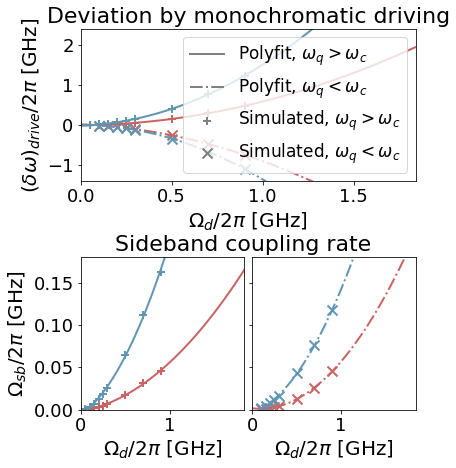

In [7]:
xlim = [0.0, 2*0.92]

fig, axes = plt.subplots(2, 1, figsize=(6,7))

plt.subplot(2, 1, 1)
plt.scatter(eps_larger[1:], devdr_red_larger, marker=markerstyles['larger'], lw=2, s=60, c=plotcolours['sbred'])
plt.scatter(eps_smaller, devdr_red_smaller, marker=markerstyles['smaller'], lw=2, s=100, c=plotcolours['sbred'])
plt.scatter(eps_larger, devdr_blue_larger, marker=markerstyles['larger'], lw=2, s=60, c=plotcolours['sbblue'])
plt.scatter(eps_smaller, devdr_blue_smaller, marker=markerstyles['smaller'], lw=2, s=100, c=plotcolours['sbblue'])

plt.plot(np.linspace(0, 2, 50), np.poly1d(devdr_red_larger_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['larger'], c=plotcolours['sbred'])
plt.plot(np.linspace(0, 2, 50), np.poly1d(devdr_red_smaller_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['smaller'], c=plotcolours['sbred'])
plt.plot(np.linspace(0, 2, 50), np.poly1d(devdr_blue_larger_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['larger'], c=plotcolours['sbblue'])
plt.plot(np.linspace(0, 2, 50), np.poly1d(devdr_blue_smaller_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['smaller'], c=plotcolours['sbblue'])

plt.scatter(-1, -1, marker=markerstyles['larger'], lw=2, s=60, c='gray', label="Simulated, $\\omega_q > \\omega_c$")
plt.scatter(-1, -1, marker=markerstyles['smaller'], lw=2, s=100, c='gray', label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(-1, -1, ls=linestyles['larger'], c='gray', label="Polyfit, $\\omega_q > \\omega_c$")
plt.plot(-1, -1, ls=linestyles['smaller'], c='gray', label="Polyfit, $\\omega_q < \\omega_c$")

plt.xlim(xlim)
plt.ylim([-1.4, 2.4])

plt.xlabel("$\\Omega_d/2\\pi$ [GHz]")
plt.ylabel("$(\\delta\\omega)_{drive}/2\\pi$ [GHz]")
plt.title("Deviation by monochromatic driving")
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(eps_larger[1:], wsb_red_larger, marker=markerstyles['larger'], lw=2, s=60, c=plotcolours['sbred'])
plt.scatter(eps_larger, wsb_blue_larger, marker=markerstyles['larger'], lw=2, s=60, c=plotcolours['sbblue'])

plt.plot(np.linspace(0, 2, 50), np.poly1d(wsb_red_larger_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['larger'], c=plotcolours['sbred'])
plt.plot(np.linspace(0, 2, 50), np.poly1d(wsb_blue_larger_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['larger'], c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([0, 0.18])

plt.xlabel("$\\Omega_d/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}/2\\pi$ [GHz]")

plt.subplot(2, 2, 4)
plt.scatter(eps_smaller, wsb_red_smaller, marker=markerstyles['smaller'], lw=2, s=100, c=plotcolours['sbred'])
plt.scatter(eps_smaller, wsb_blue_smaller, marker=markerstyles['smaller'], lw=2, s=100, c=plotcolours['sbblue'])

plt.plot(np.linspace(0, 2, 50), np.poly1d(wsb_red_smaller_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['smaller'], c=plotcolours['sbred'])
plt.plot(np.linspace(0, 2, 50), np.poly1d(wsb_blue_smaller_cfit)(np.linspace(0, 2, 50)),
         ls=linestyles['smaller'], c=plotcolours['sbblue'])

plt.xlim(xlim)
plt.ylim([0, 0.18])

plt.xlabel("$\\Omega_d/2\\pi$ [GHz]")
plt.gca().set_yticklabels([])

plt.text(0.5, 0.44, 'Sideband coupling rate', transform=fig.transFigure, horizontalalignment='center')

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.05)
plt.show()

In [17]:
b, a, nq, nc = ops(2, 10)
Hc = 0.2*2*pi*(a + a.dag())*(b + b.dag())
eps_range = np.linspace(0.0, 0.52, 100)

wd_th_red_larger = list()
wd_th_blue_larger = list()
wd_th_red_smaller = list()
wd_th_blue_smaller = list()

for eps in eps_range:
    Hi = 6.5*2*pi*nq + 4.0*2*pi*nc
    wd_th_red_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'red', 1, 
                                      eps=2*eps*2*pi, resolution=0.001*2*pi, verbose=False)/2/pi)
    wd_th_blue_larger.append(drivefreq(2, 6.5*2*pi, 4.0*2*pi, Hi+Hc, 'blue', 1,
                                       eps=2*eps*2*pi, resolution=0.001*2*pi, verbose=False)/2/pi)
    
    Hi = 4.0*2*pi*nq + 6.5*2*pi*nc
    wd_th_red_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'red', 1,
                                       eps=2*eps*2*pi, resolution=0.001*2*pi, verbose=False)/2/pi)
    wd_th_blue_smaller.append(drivefreq(2, 4.0*2*pi, 6.5*2*pi, Hi+Hc, 'blue', 1,
                                        eps=2*eps*2*pi, resolution=0.001*2*pi, verbose=False)/2/pi)

KeyboardInterrupt: 

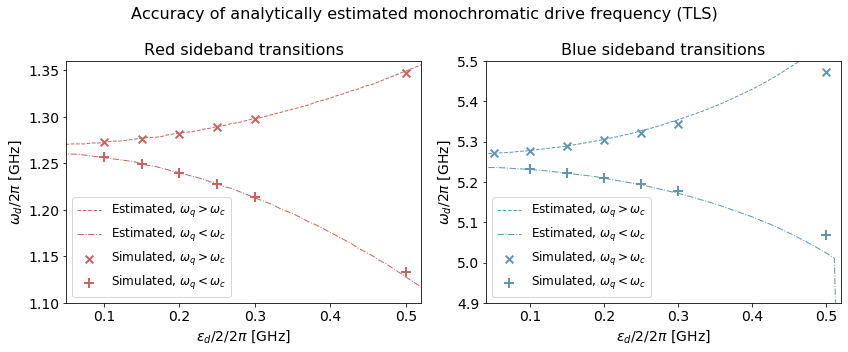

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Accuracy of analytically estimated monochromatic drive frequency (TLS)")

plt.subplot(1, 2, 1)
plt.scatter(eps_larger[1:], wd_red_larger, marker='x', lw=2, s=60, c=plotcolours['sbred'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, wd_th_red_larger, '--', c=plotcolours['sbred'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, wd_red_smaller, marker='+', lw=2, s=100, c=plotcolours['sbred'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, wd_th_red_smaller, '-.', c=plotcolours['sbred'], label="Estimated, $\\omega_q < \\omega_c$")

plt.xlim([0.05, 0.52])
plt.ylim([1.10, 1.36])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Red sideband transitions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(eps_larger, wd_blue_larger, marker='x', lw=2, s=60, c=plotcolours['sbblue'], label="Simulated, $\\omega_q > \\omega_c$")
plt.plot(eps_range, wd_th_blue_larger, '--', c=plotcolours['sbblue'], label="Estimated, $\\omega_q > \\omega_c$")
plt.scatter(eps_smaller, wd_blue_smaller, marker='+', lw=2, s=100, c=plotcolours['sbblue'], label="Simulated, $\\omega_q < \\omega_c$")
plt.plot(eps_range, wd_th_blue_smaller, '-.', c=plotcolours['sbblue'], label="Estimated, $\\omega_q < \\omega_c$")
plt.xlim([0.04, 0.52])
plt.ylim([4.9, 5.5])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\omega_d/2\\pi$ [GHz]")
plt.title("Blue sideband transitions")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.83)
plt.show()

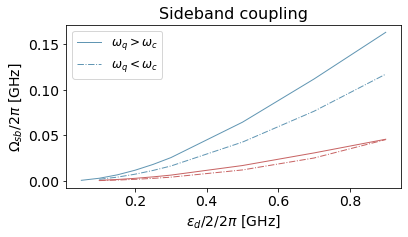

In [11]:
plt.figure(figsize=[6,3])
plt.subplot(1, 1, 1)
plt.plot(eps_larger[1:], wsb_red_larger, c=plotcolours['sbred'])
plt.plot(eps_larger, wsb_blue_larger, c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
plt.plot(eps_smaller, wsb_red_smaller, '-.', c=plotcolours['sbred'])
plt.plot(eps_smaller, wsb_blue_smaller, '-.', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}/2\\pi$ [GHz]")
plt.title("Sideband coupling")
plt.legend()
plt.show()

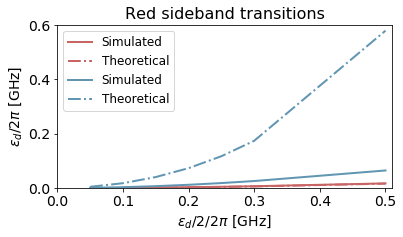

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
# fig.suptitle("TLS, single-tone drive, frequency deviation")

plt.subplot(1, 1, 1)
plt.plot(eps_larger[1:], wsb_red_larger, c=plotcolours['sbred'], alpha=alpha, label="Simulated")
plt.plot(eps_larger[1:], wsb_th_red_larger, '-.', c=plotcolours['sbred'], alpha=alpha, label="Theoretical")
plt.plot(eps_larger, wsb_blue_larger, c=plotcolours['sbblue'], alpha=alpha, label="Simulated")
plt.plot(eps_larger, wsb_th_blue_larger, '-.', c=plotcolours['sbblue'], alpha=alpha, label="Theoretical")
plt.xlim([0, 0.51])
plt.ylim([0, 0.6])
plt.xlabel("$\\epsilon_d/2/2\\pi$ [GHz]")
plt.ylabel("$\\epsilon_d/2\\pi$ [GHz]")
# plt.title("$\\omega_q > \\omega_c$")
plt.title("Red sideband transitions")
plt.legend()
plt.show()

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
# fig.suptitle("TLS, single-tone drive")

# ax1 = plt.subplot(1, 1, 1)
ax1.scatter(wd_red_larger, wsb_red_larger, marker='s', c=plotcolours['sbred'], s=200*np.asarray(eps_larger[1:]))
ax1.scatter(wd_red_smaller, wsb_red_smaller, marker='o', c=plotcolours['sbred'], s=200*np.asarray(eps_smaller))
ax1.plot(wd_red_larger, wsb_red_larger, c=plotcolours['sbred'])
ax1.plot(wd_red_smaller, wsb_red_smaller, '--', c=plotcolours['sbred'])
ax1.set_xlabel("$\\omega_d/2\\pi$ [GHz] (red)")
ax1.set_ylim([0, 0.07])
ax2 = ax1.twiny()
ax2.scatter(wd_blue_larger, wsb_blue_larger, marker='s', c=plotcolours['sbblue'], s=200*np.asarray(eps_larger))
ax2.scatter(wd_blue_smaller, wsb_blue_smaller, marker='o', c=plotcolours['sbblue'], s=200*np.asarray(eps_smaller))
ax2.plot(wd_blue_larger, wsb_blue_larger, c=plotcolours['sbblue'], label='$\\omega_q > \\omega_c$')
ax2.plot(wd_blue_smaller, wsb_blue_smaller, '--', c=plotcolours['sbblue'], label='$\\omega_q < \\omega_c$')
ax2.set_xlabel("$\\omega_d/2\\pi$ [GHz] (blue)")
ax2.tick_params(axis='x')
ax1.set_ylabel("$\\eps_{{sb}}/2\\pi$ [GHz]")
plt.legend()

plt.tight_layout()
fig.subplots_adjust(top=0.77)
plt.show()

ValueError: 
\eps_{{sb}}/2\pi
^
Unknown symbol: \eps, found '\'  (at char 0), (line:1, col:1)

ValueError: 
\eps_{{sb}}/2\pi
^
Unknown symbol: \eps, found '\'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 2 Axes>